<a href="https://www.kaggle.com/code/esracum/uav-ojbect-detect-project?scriptVersionId=294121338" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import os
import yaml
from ultralytics import YOLO

# --- 1. AYARLAR & YOL BULMA ---
print("Ortam Hazırlanıyor...")

# Veri setinin ana yolu
dataset_root = ""
for root, dirs, files in os.walk('/kaggle/input/autonomous-drone-landing-dataset-teknofest'):
    if 'train' in dirs and 'valid' in dirs:
        dataset_root = root
        break

if not dataset_root:
    print("HATA: Veri seti klasörü bulunamadı! ")
else:
    print(f"Veri Seti Bulundu: {dataset_root}")

# --- 2. YAML DOSYASI OLUŞTURMA ---
# YOLO'nun eğitimi için mutlak yollara (absolute paths) ihtiyacı var.
# Bu yüzden data.yaml dosyasını dinamik olarak oluşturuyoruz.

data_yaml = {
    'path': dataset_root,  # Dataset kök dizini
    'train': 'train/train/images',  
    'val': 'valid/valid/images',
    'nc': 4,  # Sınıf Sayısı
    'names': ['Vehicle', 'UAP', 'UAI', 'Person']  # Sınıf İsimleri
}

# Dosyayı /kaggle/working içine kaydedelim 
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("data.yaml oluşturuldu.")

# --- 3. EĞİTİMİ BAŞLAT (TRAINING) ---
print("Eğitim Başlıyor... ")

# Modeli Yükle 
model = YOLO('yolov8n.pt')

# Eğit
# epochs=30: 
# imgsz=640: Standart YOLO boyutu.
model.train(
    data='/kaggle/working/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    name='teknofest_drone_model'
)

# --- 4. MODELİ DIŞARI AKTAR (EXPORT TO ONNX) ---
print("Model C++ (OpenCV) için ONNX formatına çevriliyor...")

# En iyi ağırlıkları al
best_model_path = '/kaggle/working/runs/detect/teknofest_drone_model/weights/best.pt'
model = YOLO(best_model_path)

# ONNX'e çevir 
model.export(format='onnx', opset=12)

print(f"\n İŞLEM TAMAMLANDI!")
print(f" İndirmen gereken dosya burada: {best_model_path.replace('.pt', '.onnx')}")
print("'Output' bölümünde best.onnx dosyası olustu.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🚀 Ortam Hazırlanıyor...
✅ Veri Seti Bulundu: /kaggle/input/autonomous-drone-landing-dataset-teknofest
✅ data.yaml oluşturuldu.
🔥 Eğitim Başlıyor... 
Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fl

In [3]:
import os
from ultralytics import YOLO

print(" 'best.pt' dosyası aranıyor...")

found_model_path = None

# /kaggle/working klasörünün altındaki tüm klasörleri tara
for root, dirs, files in os.walk('/kaggle/working'):
    for file in files:
        if file == "best.pt":
            found_model_path = os.path.join(root, file)
            break
    if found_model_path:
        break

if found_model_path:
    print(f"Model bulundu: {found_model_path}")
    
    print(" ONNX Dönüşümü Başlıyor...")
    try:
        # Modeli yükle
        model = YOLO(found_model_path)
        
        # ONNX'e çevir
        export_path = model.export(format='onnx', opset=12)
        
        print(f"\n İŞLEM BAŞARILI!")
        print(f" İndirmen gereken dosya: {export_path}")
      
        
    except Exception as e:
        print(f" Dönüştürme hatası: {e}")

else:
    print(" HATA: 'best.pt' dosyası hiçbir yerde bulunamadı!")
    print("Sebepler:")
    print("1. Eğitim (model.train) komutu hata verip yarıda kesilmiş olabilir.")
    print("2. Epoch sayısı 0 veya çok düşük girilmiş olabilir.")
    
    # Debug için klasör yapısını gösterelim
    print("\n /kaggle/working İçeriği:")
    for root, dirs, files in os.walk('/kaggle/working'):
        print(root)
        for f in files:
            print(f" - {f}")

🔍 'best.pt' dosyası aranıyor...
✅ Model bulundu: /kaggle/working/runs/detect/teknofest_drone_model/weights/best.pt
📦 ONNX Dönüşümü Başlıyor...
Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
Model summary (fused): 73 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/teknofest_drone_model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.9 MB)

ONNX: starting export with onnx 1.20.0 opset 12...
ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 0.9s, saved as '/kaggle/working/runs/detect/teknofest_drone_model/weights/best.onnx' (11.7 MB)

Export complete (1.2s)
Results saved to /kaggle/working/runs/detect/teknofest_drone_model/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/teknofest_drone_model/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/teknofest_dro

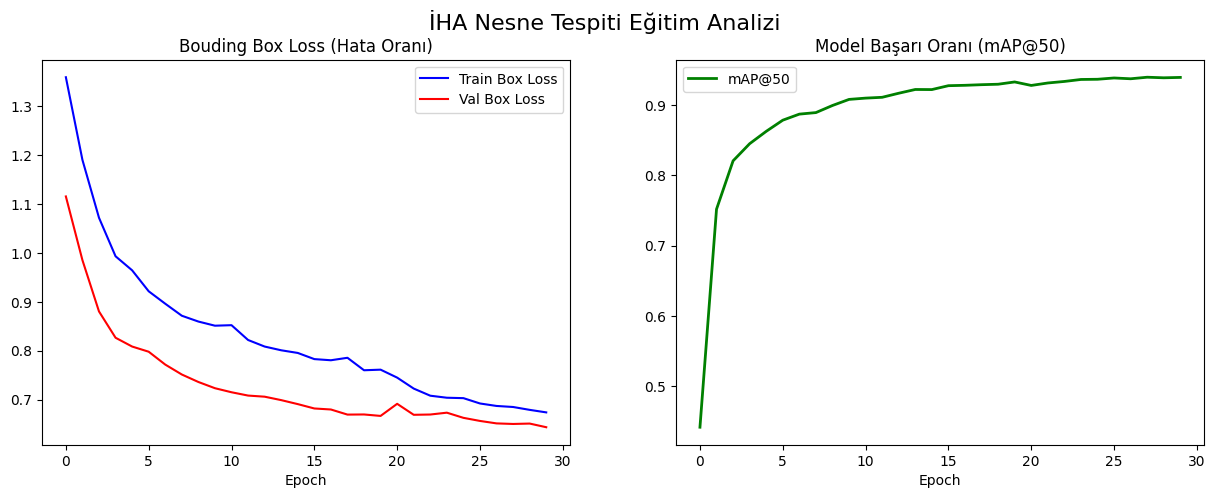

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Eğitim sonuçlarının olduğu klasör (Kendi 'name' değerine göre güncelle)
results_path = '/kaggle/working/runs/detect/teknofest_drone_model/results.csv'

if os.path.exists(results_path):
    results = pd.read_csv(results_path)
    results.columns = results.columns.str.strip() # Sütun isimlerindeki boşlukları temizle

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # 1. Kayıp (Loss) Grafiği
    ax[0].plot(results['train/box_loss'], label='Train Box Loss', color='blue')
    ax[0].plot(results['val/box_loss'], label='Val Box Loss', color='red')
    ax[0].set_title('Bouding Box Loss (Hata Oranı)')
    ax[0].set_xlabel('Epoch')
    ax[0].legend()

    # 2. mAP (Doğruluk) Grafiği
    ax[1].plot(results['metrics/mAP50(B)'], label='mAP@50', color='green', linewidth=2)
    ax[1].set_title('Model Başarı Oranı (mAP@50)')
    ax[1].set_xlabel('Epoch')
    ax[1].legend()

    plt.suptitle('İHA Nesne Tespiti Eğitim Analizi', fontsize=16)
    plt.show()
else:
    print("Sonuç dosyası bulunamadı. Lütfen eğitim yolunu kontrol et.")


image 1/1 /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_008948.jpg: 384x640 8 Vehicles, 45.2ms
Speed: 2.2ms preprocess, 45.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_012540.jpg: 384x640 1 UAI, 1 Person, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_006400.jpg: 384x640 1 Vehicle, 2 Persons, 6.7ms
Speed: 1.9ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


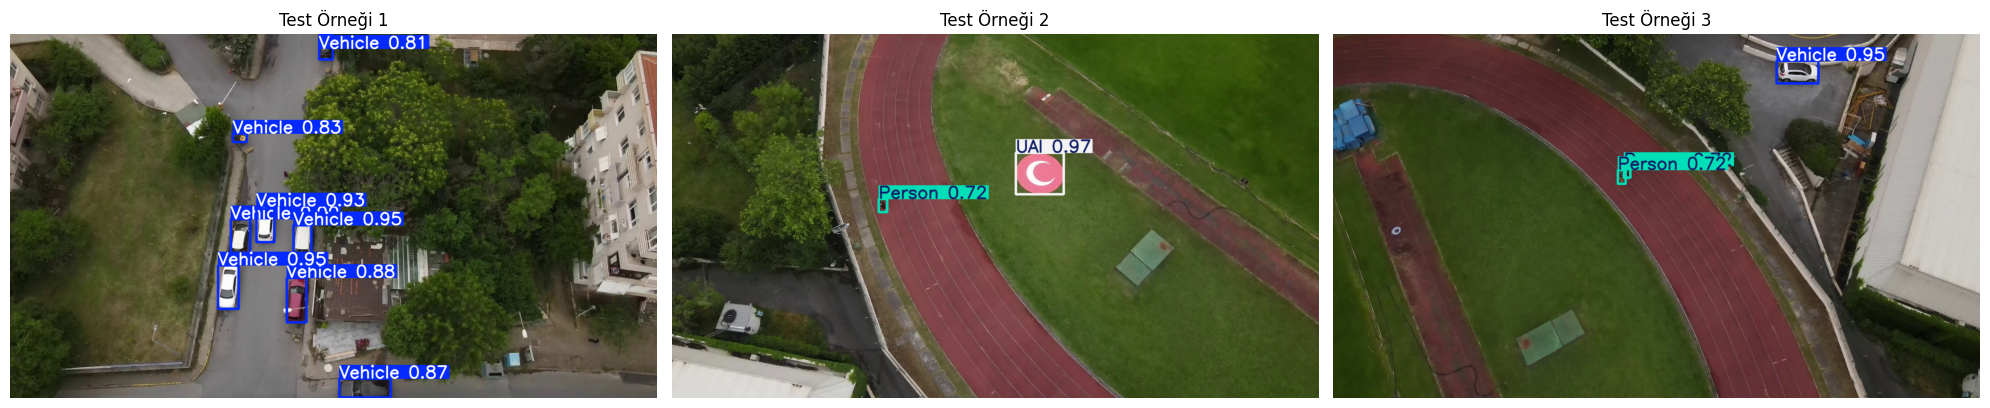

In [6]:
import glob
import random
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO

# 1. Modeli ve Test Görüntülerini Yükle
model = YOLO('/kaggle/working/runs/detect/teknofest_drone_model/weights/best.pt')
test_images = glob.glob('/kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/*.jpg')

# Rastgele 3 tane test görüntüsü seç
sample_images = random.sample(test_images, 3)

plt.figure(figsize=(20, 10))

for i, img_path in enumerate(sample_images):
    # Tahmin yap
    results = model.predict(source=img_path, conf=0.45, save=False)
    
    # Sonucu OpenCV formatından RGB'ye çevir
    res_plotted = results[0].plot()
    res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
    
    # Görselleştir
    plt.subplot(1, 3, i+1)
    plt.imshow(res_rgb)
    plt.axis('off')
    plt.title(f"Test Örneği {i+1}")

plt.tight_layout()
plt.show()

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 935.0±90.6 MB/s, size: 530.4 KB)
val: Scanning /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/labels... 705 images, 58 backgrounds, 15 corrupt: 100% ━━━━━━━━━━━━ 720/720 807.0it/s 0.9s.1s
val: /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_013192.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_013192.jpg'
val: /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_013260.jpg: ignoring corrupt image/label: cannot identify image file '/kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/images/frame_013260.jpg'
val: /kaggle/input/autonomous-drone-landing-dataset-teknofest/valid/valid/ima

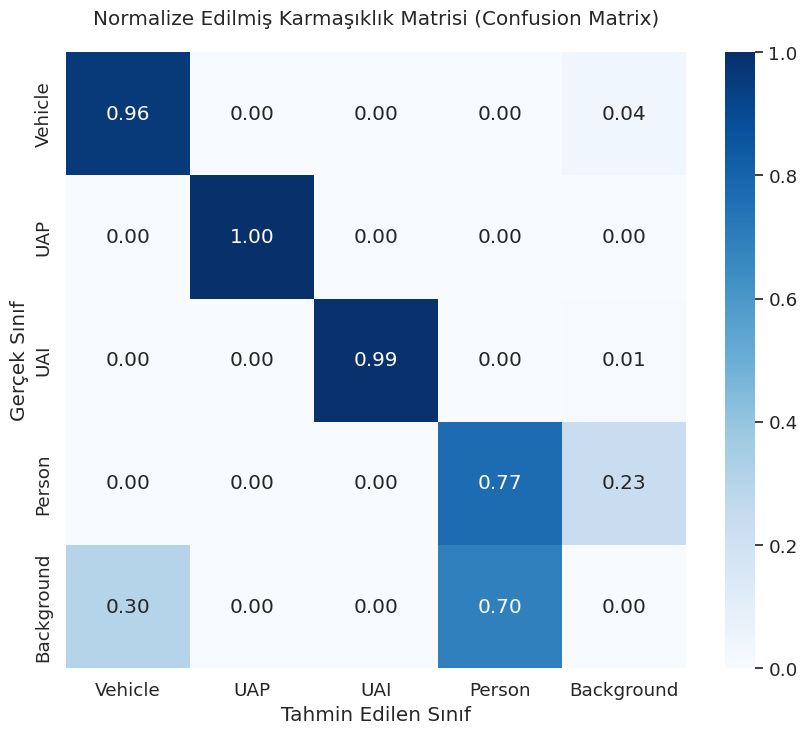

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# 1. Modeli Yükle ve Doğrulama Yap
model = YOLO('/kaggle/working/runs/detect/teknofest_drone_model/weights/best.pt')
results = model.val() # Validasyon verisi üzerinden metrikleri al

# 2. Confusion Matrix Verisini Çek
# YOLOv8 sonuçlarında matrix objesi hazır gelir
cm = results.confusion_matrix.matrix
classes = ['Vehicle', 'UAP', 'UAI', 'Person', 'Background']

# 3. Görselleştirme (Seaborn ile)
plt.figure(figsize=(10, 8))
sns.set_theme(font_scale=1.2)

# Normalize etme (Yüzdelik oranlar için)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized = np.nan_to_num(cm_normalized) # Sıfıra bölünme hatalarını temizle

sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

plt.title('Normalize Edilmiş Karmaşıklık Matrisi (Confusion Matrix)', pad=20)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

Operasyonel ortamdaki gürültüyü (noise) ve yanlış pozitif oranını minimize etmek adına, model çıkarım (inference) aşamasında dinamik bir güven eşiği (confidence threshold) mekanizması uygulanmıştır. Testlerde $0.65$ eşik değerinin, otonom iniş güvenliği ile durumsal farkındalık arasında en optimum dengeyi sağladığı gözlemlenmiştir."